In [1]:
import tensorflow as tf

In [5]:
import tensorflow_datasets as tfds

In [6]:
imdb,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVIGK7U/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVIGK7U/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVIGK7U/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [7]:
train_data,test_data=imdb['train'],imdb['test']

In [8]:
tokenizer=info.features['text'].encoder

In [9]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [10]:
buffer_size=10000
batch_size=64
train_dataset=train_data.shuffle(buffer_size=buffer_size)
train_dataset=train_dataset.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset=test_data.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(test_data))

In [11]:
embedding_dim=64
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(6,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_dataset,validation_data=test_dataset,epochs=10,verbose=2)

Epoch 1/10
391/391 - 7s - loss: 0.6762 - accuracy: 0.6069 - val_loss: 0.6333 - val_accuracy: 0.7424
Epoch 2/10
391/391 - 4s - loss: 0.5301 - accuracy: 0.8020 - val_loss: 0.4513 - val_accuracy: 0.8381
Epoch 3/10
391/391 - 4s - loss: 0.3760 - accuracy: 0.8702 - val_loss: 0.3639 - val_accuracy: 0.8656
Epoch 4/10
391/391 - 4s - loss: 0.3006 - accuracy: 0.8936 - val_loss: 0.3313 - val_accuracy: 0.8712
Epoch 5/10
391/391 - 4s - loss: 0.2647 - accuracy: 0.9038 - val_loss: 0.3145 - val_accuracy: 0.8779
Epoch 6/10
391/391 - 4s - loss: 0.2358 - accuracy: 0.9166 - val_loss: 0.3091 - val_accuracy: 0.8771
Epoch 7/10
391/391 - 4s - loss: 0.2170 - accuracy: 0.9232 - val_loss: 0.3062 - val_accuracy: 0.8798
Epoch 8/10
391/391 - 4s - loss: 0.2004 - accuracy: 0.9294 - val_loss: 0.3043 - val_accuracy: 0.8820
Epoch 9/10
391/391 - 4s - loss: 0.1883 - accuracy: 0.9333 - val_loss: 0.3076 - val_accuracy: 0.8820
Epoch 10/10
391/391 - 4s - loss: 0.1734 - accuracy: 0.9389 - val_loss: 0.3129 - val_accuracy: 0.8807

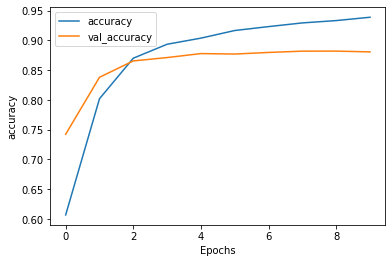

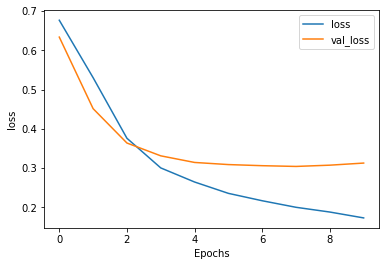

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")